In [1]:
#pandas & numpy
import pandas as pd
import numpy as np

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#the classification algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#for parameter optimization
from sklearn.model_selection import GridSearchCV

#for evaluation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read data file

#load data to pandas
data = pd.read_csv("../../data/csvData/titanicAssignment.csv")

In [3]:
data

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,0,male,60.5,0,0,263.0000,S
1,3,0,male,14.5,8,2,69.5500,S
2,3,1,male,26.0,0,0,56.4958,S
3,3,0,male,28.0,0,0,56.4958,S
4,3,1,male,32.0,0,0,56.4958,S
...,...,...,...,...,...,...,...,...
1204,1,0,male,40.0,0,0,0.0000,S
1205,1,1,male,49.0,0,0,0.0000,S
1206,1,0,male,28.0,0,0,0.0000,S
1207,1,0,male,28.0,0,0,0.0000,S


In [4]:
#deal with categoricial variables 
ohe = OneHotEncoder(categories='auto')
categorical_features = ['embarked', 'pclass', 'sex']
feature_arr = ohe.fit_transform(data[categorical_features]).toarray()

#move income column to the end 
incomeColumn = data['survived']
data.drop(labels=['survived'], axis=1,inplace = True)

#add to original data
convertedData= pd.concat([data, pd.DataFrame(feature_arr),incomeColumn], axis=1)
convertedData.head()

,pclass,sex,age,sibsp,parch,fare,embarked,0,1,2,3,4,5,6,7,survived
0,3,male,60.5,0,0,263.0000,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,3,male,14.5,8,2,69.5500,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
2,3,male,26.0,0,0,56.4958,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
3,3,male,28.0,0,0,56.4958,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
4,3,male,32.0,0,0,56.4958,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1


In [5]:
#remove the original categorical data 
convertedData=convertedData.drop(columns=categorical_features)
convertedData

,age,sibsp,parch,fare,0,1,2,3,4,5,6,7,survived
0,60.5,0,0,263.0000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,14.5,8,2,69.5500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
2,26.0,0,0,56.4958,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
3,28.0,0,0,56.4958,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
4,32.0,0,0,56.4958,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,40.0,0,0,0.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
1205,49.0,0,0,0.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
1206,28.0,0,0,0.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
1207,28.0,0,0,0.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0


In [6]:
scaler=StandardScaler()
convertedData.iloc[:, 0:4]=scaler.fit_transform(convertedData.iloc[:, 0:4])
convertedData

,age,sibsp,parch,fare,0,1,2,3,4,5,6,7,survived
0,2.301222,-0.534894,-0.474556,4.246850,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,-1.127599,8.541409,1.993135,0.644773,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
2,-0.270394,-0.534894,-0.474556,0.401702,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
3,-0.121314,-0.534894,-0.474556,0.401702,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
4,0.176844,-0.534894,-0.474556,0.401702,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,0.773161,-0.534894,-0.474556,-0.650261,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
1205,1.444017,-0.534894,-0.474556,-0.650261,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
1206,-0.121314,-0.534894,-0.474556,-0.650261,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
1207,-0.121314,-0.534894,-0.474556,-0.650261,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0


In [7]:
len(convertedData.columns)

13

In [8]:
X = convertedData.iloc[:, 0:len(convertedData.columns)-1].values 
Y = convertedData["survived"].values

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print(X_train)
print(Y_train)

[[ 0.40046275  0.59964404 -0.47455601 ...  0.          1.
   0.        ]
 [ 0.99677945  0.59964404  0.75928962 ...  0.          0.
   1.        ]
 [ 0.47500234  0.59964404 -0.47455601 ...  0.          0.
   1.        ]
 ...
 [-0.19585395 -0.53489374 -0.47455601 ...  0.          0.
   1.        ]
 [-0.4940123  -0.53489374 -0.47455601 ...  0.          0.
   1.        ]
 [-0.12131436 -0.53489374 -0.47455601 ...  0.          0.
   1.        ]]
[1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0
 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0
 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1
 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 

In [9]:
# ##モデルの宣言
#SVM
svmCLF= SVC(C=1000,kernel="rbf")

#NaiveBayes
NBCLF= GaussianNB()

#Random Forest
RFCLF= RandomForestClassifier(max_depth=80,n_estimators=100)

In [10]:
# ##Cross-Validation の F-score の計算
#SVM
scores = cross_val_score(svmCLF, X_train,Y_train, scoring="f1_macro", cv=5)
print("SVM Score")
print(scores)
print("SVM F1 Macro: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

#Naive Bayes
scores = cross_val_score(NBCLF, X_train,Y_train, scoring="f1_macro", cv=5)
print("NB Score")
print(scores)
print("NB F1 Macro: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

#Random Forest
scores = cross_val_score(RFCLF,X_train,Y_train, scoring="f1_macro", cv=5)
print("RF Score")
print(scores)
print("RF F1 Macro: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

SVM Score
[0.76600877 0.71126899 0.65709376 0.73561644 0.7819209 ]
SVM F1 Macro: 73.04% (4.40%)
NB Score
[0.7592853  0.73561396 0.70829601 0.7799071  0.79221532]
NB F1 Macro: 75.51% (3.03%)
RF Score
[0.75364081 0.72353089 0.70698381 0.7485888  0.79282486]
RF F1 Macro: 74.51% (2.93%)


In [11]:
cvs = [3, 5, 10, 15]
scores_set = {}
scores_set['svm'] = {}
scores_set['nb'] = {}
scores_set['rf'] = {}
for cv in cvs:
    #SVM
    scores = cross_val_score(svmCLF, X_train,Y_train, scoring="f1_macro", cv=cv)
    print("SVM Score")
    print(scores)
    print("SVM F1 Macro: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))
    scores_set['svm'][cv] = scores

    #Naive Bayes
    scores = cross_val_score(NBCLF, X_train,Y_train, scoring="f1_macro", cv=cv)
    print("NB Score")
    print(scores)
    print("NB F1 Macro: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))
    scores_set['nb'][cv] = scores

    #Random Forest
    scores = cross_val_score(RFCLF,X_train,Y_train, scoring="f1_macro", cv=cv)
    print("RF Score")
    print(scores)
    print("RF F1 Macro: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))
    scores_set['rf'][cv] = scores

SVM Score
[0.73217247 0.72049795 0.74136546]
SVM F1 Macro: 73.13% (0.85%)
NB Score
[0.75856566 0.7286741  0.77631788]
NB F1 Macro: 75.45% (1.97%)
RF Score
[0.74063846 0.72196867 0.78885246]
RF F1 Macro: 75.05% (2.82%)
SVM Score
[0.76600877 0.71126899 0.65709376 0.73561644 0.7819209 ]
SVM F1 Macro: 73.04% (4.40%)
NB Score
[0.7592853  0.73561396 0.70829601 0.7799071  0.79221532]
NB F1 Macro: 75.51% (3.03%)
RF Score
[0.77397242 0.72353089 0.71649718 0.75827921 0.77311912]
RF F1 Macro: 74.91% (2.45%)
SVM Score
[0.80988676 0.73082473 0.73497268 0.74041035 0.69714541 0.73783784
 0.76382609 0.74285714 0.78407557 0.74952562]
SVM F1 Macro: 74.91% (2.93%)
NB Score
[0.79995658 0.71599099 0.74473684 0.75625478 0.64134454 0.77578426
 0.82694023 0.74285714 0.81960871 0.76248313]
NB F1 Macro: 75.86% (5.14%)
RF Score
[0.83203463 0.68775669 0.74041035 0.70929071 0.64134454 0.77389277
 0.7764977  0.76792909 0.79838621 0.75578437]
RF F1 Macro: 74.83% (5.30%)
SVM Score
[0.80994152 0.79027054 0.71491228 0.

In [12]:
scores_set

{'svm': {3: array([0.73217247, 0.72049795, 0.74136546]),
  5: array([0.76600877, 0.71126899, 0.65709376, 0.73561644, 0.7819209 ]),
  10: array([0.80988676, 0.73082473, 0.73497268, 0.74041035, 0.69714541,
         0.73783784, 0.76382609, 0.74285714, 0.78407557, 0.74952562]),
  15: array([0.80994152, 0.79027054, 0.71491228, 0.76449275, 0.6888385 ,
         0.71153846, 0.62894018, 0.63228454, 0.74089069, 0.72852598,
         0.73333333, 0.72901619, 0.81813485, 0.74374374, 0.7373461 ])},
 'nb': {3: array([0.75856566, 0.7286741 , 0.77631788]),
  5: array([0.7592853 , 0.73561396, 0.70829601, 0.7799071 , 0.79221532]),
  10: array([0.79995658, 0.71599099, 0.74473684, 0.75625478, 0.64134454,
         0.77578426, 0.82694023, 0.74285714, 0.81960871, 0.76248313]),
  15: array([0.84161793, 0.68341451, 0.71153846, 0.71153846, 0.85480268,
         0.68869732, 0.60606061, 0.71893568, 0.79277709, 0.82072829,
         0.80566802, 0.69034887, 0.83805668, 0.77931034, 0.75553858])},
 'rf': {3: array([0.740

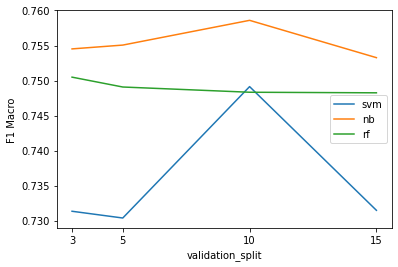

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.xlabel('validation_split')
plt.ylabel('F1 Macro')
x = list(scores_set['svm'].keys())
for model_name, results in scores_set.items():
    y = [scores.mean() for cv, scores in results.items()]
    plt.plot(x, y, label=model_name)

plt.legend()
plt.xticks(x)
plt.show()
file_path = 'cv.png'
fig.savefig(file_path)

In [14]:
#SVM
svmCLF= SVC(C=10,kernel="linear")
#NaiveBayes
NBCLF= GaussianNB()
#Random Forest
RFCLF= RandomForestClassifier(max_depth=100,n_estimators=100)

#新しいデータを予測する
svmCLF.fit(X_train,Y_train)
NBCLF.fit(X_train,Y_train)
RFCLF.fit(X_train,Y_train)

#実際にデータを予測する
svmPred=svmCLF.predict(X_test)
NBPred=NBCLF.predict(X_test)
RFPred=RFCLF.predict(X_test)

#予測したデータを元のデータに追加する
testDataWithPrediction= pd.concat([pd.DataFrame(Y_test,columns={"true"}),pd.DataFrame(svmPred,columns={"svmPred"})
                                   ,pd.DataFrame(NBPred,columns={"NBPred"}),pd.DataFrame(RFPred,columns={"RFPred"})],axis=1)

#ファイルをダウンロードする
PredictFile= pd.concat([pd.DataFrame(X_test,columns= convertedData.iloc[:, 0:len(convertedData.columns)-1].columns),testDataWithPrediction],axis=1)
PredictFile.to_csv('outputClassification.csv')

#予測したデータ出力する
testDataWithPrediction

,true,svmPred,NBPred,RFPred
0,0,0,0,0
1,0,0,0,1
2,0,0,0,0
3,0,1,1,0
4,1,1,1,1
...,...,...,...,...
237,0,0,0,0
238,0,0,0,0
239,1,1,1,1
240,0,0,0,0
